#### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### import dataset - global heat index

In [2]:
data = pd.read_csv("../datasets/global_heat_index.csv")
data.head(20)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
5,2011,1,1,5,1,8.098655,985.723206,65.278494,89.290062,1.937899,0
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   17520 non-null  int64  
 1   Month                  17520 non-null  int64  
 2   Day                    17520 non-null  int64  
 3   Hour                   17520 non-null  int64  
 4   Dew Point              17520 non-null  int64  
 5   Temperature            17520 non-null  float64
 6   Pressure               17520 non-null  float64
 7   Relative Humidity      17520 non-null  float64
 8   Wind Direction         17520 non-null  float64
 9   Wind Speed             17520 non-null  float64
 10  Solar Radiation (GHI)  17520 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.5 MB


In [4]:
data.describe()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,2011.500000,6.526027,15.720548,11.500000,11.375171,26.953731,979.699263,47.635089,182.306160,2.637895,235.047945
std,0.500014,3.447950,8.796498,6.922384,10.850196,8.417945,6.130488,26.734818,98.695757,1.244842,312.916933
min,2011.000000,1.000000,1.000000,0.000000,-28.000000,5.063506,964.755859,0.921771,0.034660,0.030113,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,3.000000,21.611058,974.325027,23.413340,84.141256,1.718903,0.000000
50%,2011.500000,7.000000,16.000000,11.500000,12.000000,27.455196,980.491516,46.529440,221.495407,2.564217,0.000000
75%,2012.000000,10.000000,23.000000,17.250000,22.000000,32.031030,984.943756,69.450031,250.299492,3.412514,489.250000
max,2012.000000,12.000000,31.000000,23.000000,27.000000,52.157927,993.353210,100.000000,359.989960,7.287084,1001.000000


### Data cleansing

#### removing datapoints for night 
as there will be no sun radiation at night

In [17]:
data = data[(data['Hour'] >= 6) & (data['Hour'] <= 18)]
data.head(20)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533
11,2011,1,1,11,2,21.354047,987.463867,29.157015,12.976929,0.980117,649
12,2011,1,1,12,2,22.161257,986.386169,27.593071,4.777779,1.411915,698
13,2011,1,1,13,2,22.256216,985.736511,27.274695,5.355347,1.747909,675
14,2011,1,1,14,2,21.725884,985.521545,27.819289,6.877182,2.005287,582
15,2011,1,1,15,2,20.507269,985.279663,30.023284,10.448921,2.206879,430


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9490 entries, 6 to 17514
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   9490 non-null   int64  
 1   Month                  9490 non-null   int64  
 2   Day                    9490 non-null   int64  
 3   Hour                   9490 non-null   int64  
 4   Dew Point              9490 non-null   int64  
 5   Temperature            9490 non-null   float64
 6   Pressure               9490 non-null   float64
 7   Relative Humidity      9490 non-null   float64
 8   Wind Direction         9490 non-null   float64
 9   Wind Speed             9490 non-null   float64
 10  Solar Radiation (GHI)  9490 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 889.7 KB


### Input and output seperation

In [26]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
print(x.head())
print(y.head())

    Year  Month  Day  Hour  Dew Point  Temperature    Pressure  \
6   2011      1    1     6          2     7.806705  986.249146   
7   2011      1    1     7          2     9.036408  987.038940   
8   2011      1    1     8          3    12.158280  987.897400   
9   2011      1    1     9          3    14.965301  988.211914   
10  2011      1    1    10          3    18.956082  988.054504   

    Relative Humidity  Wind Direction  Wind Speed  
6           67.093181       95.835983    1.815175  
7           64.035483      105.198181    1.615310  
8           55.105656      113.317665    1.439088  
9           47.166938      117.327606    1.063374  
10          36.747087       72.488327    0.545695  
6       0
7       0
8     159
9     363
10    533
Name: Solar Radiation (GHI), dtype: int64


### feature selection using correlation matrix with heatmap

In [ ]:
corr_matrix = data.corr()

<Axes: >

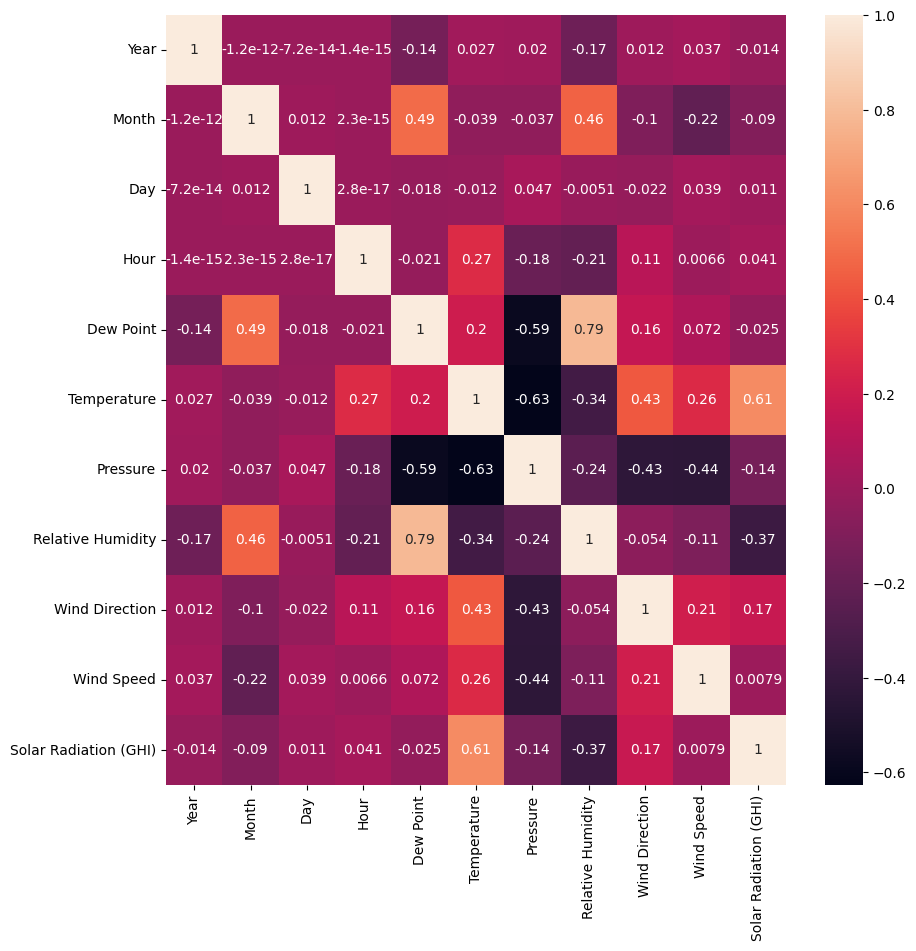

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True)

##### as we can see 
temperate has +.61 ,
wind dir +.17 ,
relative humidity -37 

#### using extraTreesClassifier

In [30]:
from sklearn.ensemble import ExtraTreesRegressor

In [31]:
model = ExtraTreesRegressor()

In [36]:
model.fit(x,y)

ExtraTreesRegressor()

In [39]:
imp = pd.Series(model.feature_importances_,index=x.columns)
imp

Year                 0.004053
Month                0.023031
Day                  0.010075
Hour                 0.738242
Dew Point            0.008416
Temperature          0.157977
Pressure             0.014641
Relative Humidity    0.025723
Wind Direction       0.009429
Wind Speed           0.008414
dtype: float64

<Axes: >

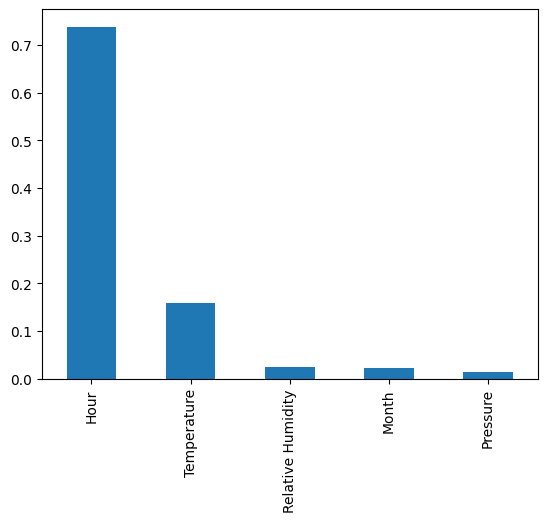

In [38]:
imp.nlargest(5).plot(kind="bar")

             Feature  Importance
3               Hour    0.717424
5        Temperature    0.179821
7  Relative Humidity    0.026138
1              Month    0.022649
6           Pressure    0.013736
2                Day    0.010127
8     Wind Direction    0.009047
4          Dew Point    0.008891
9         Wind Speed    0.008220
0               Year    0.003947


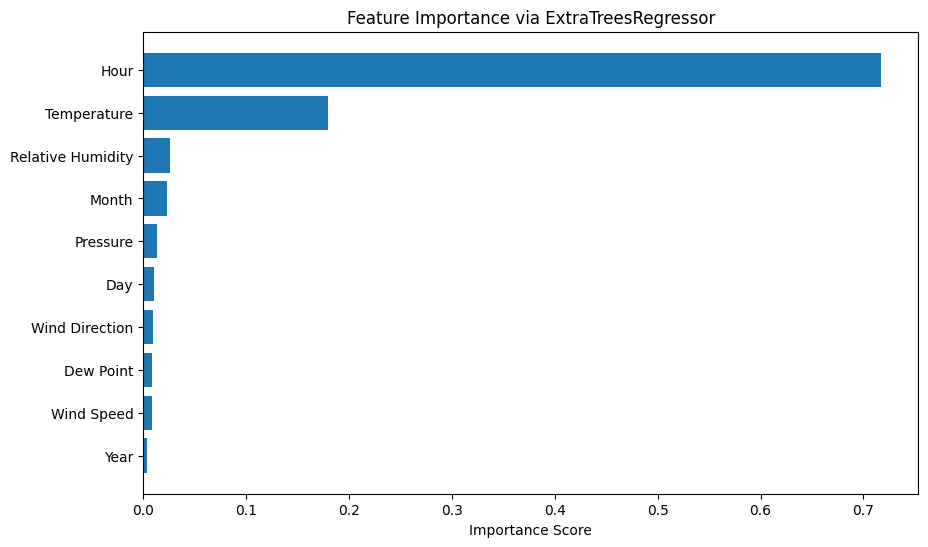

In [41]:
from sklearn.ensemble import ExtraTreesRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Fit the model
model = ExtraTreesRegressor()
model.fit(x, y)

# Get feature importances
importances = model.feature_importances_
feature_names = x.columns

# Create a DataFrame for easy viewing
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top features
print(feat_importance_df)

# Optional: Visualize
plt.figure(figsize=(10,6))
plt.barh(feat_importance_df['Feature'], feat_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance via ExtraTreesRegressor')
plt.xlabel('Importance Score')
plt.show()